In [547]:
% matplotlib inline
import datetime
import numpy as np
import pandas as pd

In [548]:
df = pd.read_csv("Iowa_Liquor_sales_sample_10pct.csv")
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


# Clean Data

In [549]:
del df['Item Description']
del df['Category Name']
del df['County']
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,1051100.0,55,54436,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,1011100.0,395,27605,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,1011200.0,65,19067,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,1071100.0,395,59154,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,1031080.0,297,35918,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [550]:
cols = ["State Bottle Cost", "State Bottle Retail", "Sale (Dollars)"]
for col in cols:
    df[col] = df[col].apply(lambda x: float(x[1:]))
df.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
Category                 float64
Vendor Number              int64
Item Number                int64
Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [551]:
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,1051100.0,55,54436,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,1011100.0,395,27605,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,1011200.0,65,19067,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,1071100.0,395,59154,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,1031080.0,297,35918,1750,7.20,10.80,12,129.60,21.0,5.55


In [552]:
df.dropna(inplace=True)
df.isnull().any()

Date                     False
Store Number             False
City                     False
Zip Code                 False
County Number            False
Category                 False
Vendor Number            False
Item Number              False
Bottle Volume (ml)       False
State Bottle Cost        False
State Bottle Retail      False
Bottles Sold             False
Sale (Dollars)           False
Volume Sold (Liters)     False
Volume Sold (Gallons)    False
dtype: bool

In [553]:
df["County Number"] = df["County Number"].apply(lambda x: int(x))
df["Category"] = df["Category"].apply(lambda x: int(x))
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9,1051100,55,54436,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82,1011100,395,27605,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7,1011200,65,19067,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85,1071100,395,59154,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99,1031080,297,35918,1750,7.20,10.80,12,129.60,21.0,5.55


# Filter the Data

In [554]:
dates = df.groupby(["Store Number"], as_index = False)
dates = dates.agg({"Date": [np.min, np.max]})
dates.head()

Store Number       Date           
                     amin       amax
0         2106 2015-01-08 2016-03-31
1         2113 2015-01-07 2016-03-23
2         2130 2015-01-08 2016-03-31
3         2152 2015-01-08 2016-02-25
4         2178 2015-01-07 2016-03-30

In [555]:
opened_early = datetime.datetime(2015,3,1)
opened_late = datetime.datetime(2015,10,1)
mask = (dates['Date', 'amin'] < opened_early) & (dates['Date', 'amax'] > opened_late)
good_stores = dates[mask]["Store Number"]
df = df[df["Store Number"].isin(good_stores)]
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9,1051100,55,54436,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82,1011100,395,27605,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7,1011200,65,19067,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85,1071100,395,59154,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99,1031080,297,35918,1750,7.20,10.80,12,129.60,21.0,5.55


# Compute New Columns and Tables

In [556]:
df["Margin"] = (df["State Bottle Retail"] - df["State Bottle Cost"]) * df["Bottles Sold"]
df['Price per bottle'] = df["Sale (Dollars)"] / df["Volume Sold (Liters)"]
df["Price per Liter"] = df["Sale (Dollars)"] / df["Bottles Sold"]
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margin,Price per bottle,Price per Liter
0,2015-11-04,3717,SUMNER,50674,9,1051100,55,54436,750,4.50,6.75,12,81.00,9.0,2.38,27.00,9.000000,6.75
1,2016-03-02,2614,DAVENPORT,52807,82,1011100,395,27605,750,13.75,20.63,2,41.26,1.5,0.40,13.76,27.506667,20.63
2,2016-02-11,2106,CEDAR FALLS,50613,7,1011200,65,19067,1000,12.59,18.89,24,453.36,24.0,6.34,151.20,18.890000,18.89
3,2016-02-03,2501,AMES,50010,85,1071100,395,59154,1750,9.50,14.25,6,85.50,10.5,2.77,28.50,8.142857,14.25
4,2015-08-18,3654,BELMOND,50421,99,1031080,297,35918,1750,7.20,10.80,12,129.60,21.0,5.55,43.20,6.171429,10.80


In [557]:
# Sales 2015
import numpy as np
df.sort(['Date'],ascending=True, inplace = True)
start_date = datetime.datetime(2015,1,1)
end_date = datetime.datetime(2015,12,31)
sales = df[(df['Date']>=start_date)&(df['Date']<=end_date)].pivot_table(
    index=['Store Number'],
    values=["Sale (Dollars)", 'Volume Sold (Liters)','Margin','Price per Liter'],
aggfunc = {"Sale (Dollars)":[sum,np.mean],
         'Volume Sold (Liters)': [sum,np.mean],
         'Margin': np.mean,
         'Price per Liter': np.mean })
sales.columns = [' '.join(col).strip() for col in sales.columns.values]
sales.columns = [u"2015 Price per Liter mean",u"2015 Margin mean",u"2015 Sale (Dollars) mean",
                "2015 Sale (Dollars) sum",u"2015 Volume Sold (Liters) mean",u"2015 Volume Sold (Liters) sum"]
sales.head()

/Users/tianjiaoxie/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,2015 Price per Liter mean,2015 Margin mean,2015 Sale (Dollars) mean,2015 Sale (Dollars) sum,2015 Volume Sold (Liters) mean,2015 Volume Sold (Liters) sum
Store Number,,,,,,
2106,15.475863,92.671879,277.658861,146326.22,18.466509,9731.85
2113,16.315646,21.149932,63.334830,9310.22,4.488776,659.85
2130,14.764286,95.217347,285.386301,111871.43,17.580026,6891.37
2152,12.887660,18.351277,54.759433,7721.08,4.491986,633.37
2178,14.558692,34.454430,102.633671,24324.18,8.089114,1917.12


In [558]:
"""
import numpy as np
df.sort(['Date'],ascending=True, inplace = True)
start_date = datetime.datetime(2015,1,1)
end_date = datetime.datetime(2015,12,31)
sales = df[(df['Date']>=start_date)&(df['Date']<=end_date)].pivot_table(
    index=['Store Number'],
    values=["Sale (Dollars)", 'Volume Sold (Liters)','Margin','Price per bottle','Price per Liter'],
aggfunc = {"Sale (Dollars)":[sum,np.mean],
         'Volume Sold (Liters)': sum,
         'Margin': [sum,np.mean]
         'Price per bottle': np.mean,
         'Price per Liter': np.mean })
sales.columns = [' '.join(col).strip() for col in sales.columns.values]
sales.columns = [u'Price per bottle mean', u"Price per Liter mean",u"Margin sum",u"2015 Sale (Dollars) mean",
                "2015 Sale (Dollars) sum",u"Volume Sold (Liters) sum"]
sales.head()
"""

'\nimport numpy as np\ndf.sort([\'Date\'],ascending=True, inplace = True)\nstart_date = datetime.datetime(2015,1,1)\nend_date = datetime.datetime(2015,12,31)\nsales = df[(df[\'Date\']>=start_date)&(df[\'Date\']<=end_date)].pivot_table(\n    index=[\'Store Number\'],\n    values=["Sale (Dollars)", \'Volume Sold (Liters)\',\'Margin\',\'Price per bottle\',\'Price per Liter\'],\naggfunc = {"Sale (Dollars)":[sum,np.mean],\n         \'Volume Sold (Liters)\': sum,\n         \'Margin\': [sum,np.mean]\n         \'Price per bottle\': np.mean,\n         \'Price per Liter\': np.mean })\nsales.columns = [\' \'.join(col).strip() for col in sales.columns.values]\nsales.columns = [u\'Price per bottle mean\', u"Price per Liter mean",u"Margin sum",u"2015 Sale (Dollars) mean",\n                "2015 Sale (Dollars) sum",u"Volume Sold (Liters) sum"]\nsales.head()\n'

In [559]:
# Sales 2015  Q1
start_date = pd.Timestamp('20150101')
end_date = pd.Timestamp('20150331')
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
sales_2015_q1 = df[mask].pivot_table(index = ['Store Number'], values = ['Sale (Dollars)'],aggfunc = sum)
sales_2015_q1['2015 Sales Q1'] = sales_2015_q1['Sale (Dollars)']
del sales_2015_q1['Sale (Dollars)']
sales_2015_q1

,2015 Sales Q1
Store Number,
2106,39287.29
2113,2833.25
2130,24272.57
2152,2003.46
2178,5856.41
2190,29452.92
2191,29085.57
2200,4900.43
2205,6407.74


In [560]:
# Sales 2016 Q1
start_date = pd.Timestamp('20160101')
end_date = pd.Timestamp('20160331')
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
sales_2016_q1 = df[mask].pivot_table(index = ['Store Number'], values = ['Sale (Dollars)'],aggfunc = sum)
sales_2016_q1['2016 Sales Q1'] = sales_2016_q1['Sale (Dollars)']
del sales_2016_q1['Sale (Dollars)']
sales_2016_q1

,2016 Sales Q1
Store Number,
2106,30523.75
2113,2065.90
2130,27856.11
2152,904.66
2178,5588.50
2190,34515.69
2191,47338.20
2200,4174.87
2228,3086.38


In [561]:
extended = sales.merge(sales_2015_q1, left_index=True, right_index=True)
extended.head()

,2015 Price per Liter mean,2015 Margin mean,2015 Sale (Dollars) mean,2015 Sale (Dollars) sum,2015 Volume Sold (Liters) mean,2015 Volume Sold (Liters) sum,2015 Sales Q1
Store Number,,,,,,,
2106,15.475863,92.671879,277.658861,146326.22,18.466509,9731.85,39287.29
2113,16.315646,21.149932,63.334830,9310.22,4.488776,659.85,2833.25
2130,14.764286,95.217347,285.386301,111871.43,17.580026,6891.37,24272.57
2152,12.887660,18.351277,54.759433,7721.08,4.491986,633.37,2003.46
2178,14.558692,34.454430,102.633671,24324.18,8.089114,1917.12,5856.41


In [562]:
extended = extended.merge(sales_2016_q1, left_index=True, right_index=True, how = 'right')

In [563]:
extended.head()

,2015 Price per Liter mean,2015 Margin mean,2015 Sale (Dollars) mean,2015 Sale (Dollars) sum,2015 Volume Sold (Liters) mean,2015 Volume Sold (Liters) sum,2015 Sales Q1,2016 Sales Q1
Store Number,,,,,,,,
2106,15.475863,92.671879,277.658861,146326.22,18.466509,9731.85,39287.29,30523.75
2113,16.315646,21.149932,63.334830,9310.22,4.488776,659.85,2833.25,2065.90
2130,14.764286,95.217347,285.386301,111871.43,17.580026,6891.37,24272.57,27856.11
2152,12.887660,18.351277,54.759433,7721.08,4.491986,633.37,2003.46,904.66
2178,14.558692,34.454430,102.633671,24324.18,8.089114,1917.12,5856.41,5588.50


In [564]:
q1_sales = extended[['2015 Sales Q1','2016 Sales Q1']]
q1_sales.head()

,2015 Sales Q1,2016 Sales Q1
Store Number,,
2106,39287.29,30523.75
2113,2833.25,2065.90
2130,24272.57,27856.11
2152,2003.46,904.66
2178,5856.41,5588.50


(0, 50000)

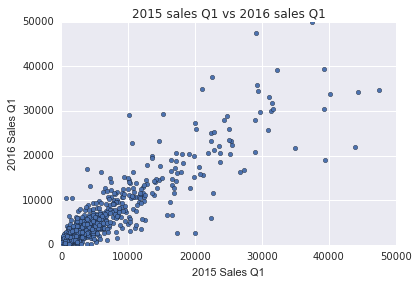

In [565]:
q1_sales.plot.scatter('2015 Sales Q1','2016 Sales Q1')
plt.title('2015 sales Q1 vs 2016 sales Q1')
#plt.xlabel('2015')
#plt.ylabel('2016')
plt.xlim(0,50000)
plt.ylim(0,50000)

In [566]:
import sklearn.grid_search
import sklearn.linear_model
from sklearn.cross_validation import train_test_split
import sklearn.tree
import seaborn

# Ransac Regressor （2015 q1 sales vs 2016 q1 sales）

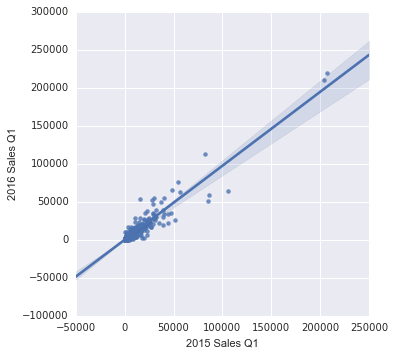

In [567]:
seaborn.pairplot(q1_sales,x_vars=['2015 Sales Q1'], y_vars='2016 Sales Q1',size = 5,kind='reg')

In [568]:
X = q1_sales[['2015 Sales Q1']]
y = q1_sales['2016 Sales Q1']

In [569]:
(X_train,X_test,y_train,y_test)= train_test_split(X, y)

In [570]:
len(X_train),len(X_test)

(857, 286)

In [571]:
len(y_train),len(y_test)

(857, 286)

In [572]:
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(X_train,y_train)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [573]:
ransac.estimator_.coef_

array([ 0.80146184])

In [574]:
ransac.estimator_.intercept_

325.25438728384484

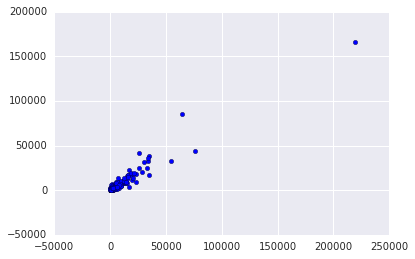

In [575]:
predictions = ransac.predict(X_test)
plt.scatter(y_test,predictions)

In [576]:
sklearn.metrics.r2_score(y_test, predictions)

0.90341301419825326

In [577]:
ransac.predict(20000)

array([ 16354.49126814])

# Linear Regression （2015 q1 sales vs 2016 q1 sales）

In [578]:
X = q1_sales[['2015 Sales Q1']]
y = q1_sales['2016 Sales Q1']

In [579]:
(X_train,X_test,y_train,y_test) = train_test_split(X, y)

In [580]:
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [581]:
lr.coef_

array([ 0.9528117])

In [582]:
lr.intercept_

205.69841688984616

In [583]:
lr.score(X_train,y_train)

0.91866604280151809

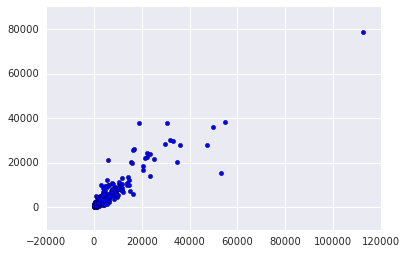

In [584]:
predictions = lr.predict(X_test)
plt.scatter(y_test,predictions)

In [585]:
sklearn.metrics.r2_score(y_test, predictions)

0.82357955200293831

In [586]:
extended.head()

,2015 Price per Liter mean,2015 Margin mean,2015 Sale (Dollars) mean,2015 Sale (Dollars) sum,2015 Volume Sold (Liters) mean,2015 Volume Sold (Liters) sum,2015 Sales Q1,2016 Sales Q1
Store Number,,,,,,,,
2106,15.475863,92.671879,277.658861,146326.22,18.466509,9731.85,39287.29,30523.75
2113,16.315646,21.149932,63.334830,9310.22,4.488776,659.85,2833.25,2065.90
2130,14.764286,95.217347,285.386301,111871.43,17.580026,6891.37,24272.57,27856.11
2152,12.887660,18.351277,54.759433,7721.08,4.491986,633.37,2003.46,904.66
2178,14.558692,34.454430,102.633671,24324.18,8.089114,1917.12,5856.41,5588.50


In [587]:
extended.corr()

,2015 Price per Liter mean,2015 Margin mean,2015 Sale (Dollars) mean,2015 Sale (Dollars) sum,2015 Volume Sold (Liters) mean,2015 Volume Sold (Liters) sum,2015 Sales Q1,2016 Sales Q1
2015 Price per Liter mean,1.000000,0.401609,0.402122,0.299636,0.283057,0.291659,0.288056,0.279914
2015 Margin mean,0.401609,1.000000,0.999977,0.425032,0.914719,0.417499,0.396500,0.373282
2015 Sale (Dollars) mean,0.402122,0.999977,1.000000,0.425460,0.913386,0.417673,0.396774,0.373713
2015 Sale (Dollars) sum,0.299636,0.425032,0.425460,1.000000,0.417401,0.992419,0.983339,0.968268
2015 Volume Sold (Liters) mean,0.283057,0.914719,0.913386,0.417401,1.000000,0.439026,0.394192,0.367309
2015 Volume Sold (Liters) sum,0.291659,0.417499,0.417673,0.992419,0.439026,1.000000,0.974790,0.955759
2015 Sales Q1,0.288056,0.396500,0.396774,0.983339,0.394192,0.974790,1.000000,0.949792
2016 Sales Q1,0.279914,0.373282,0.373713,0.968268,0.367309,0.955759,0.949792,1.000000


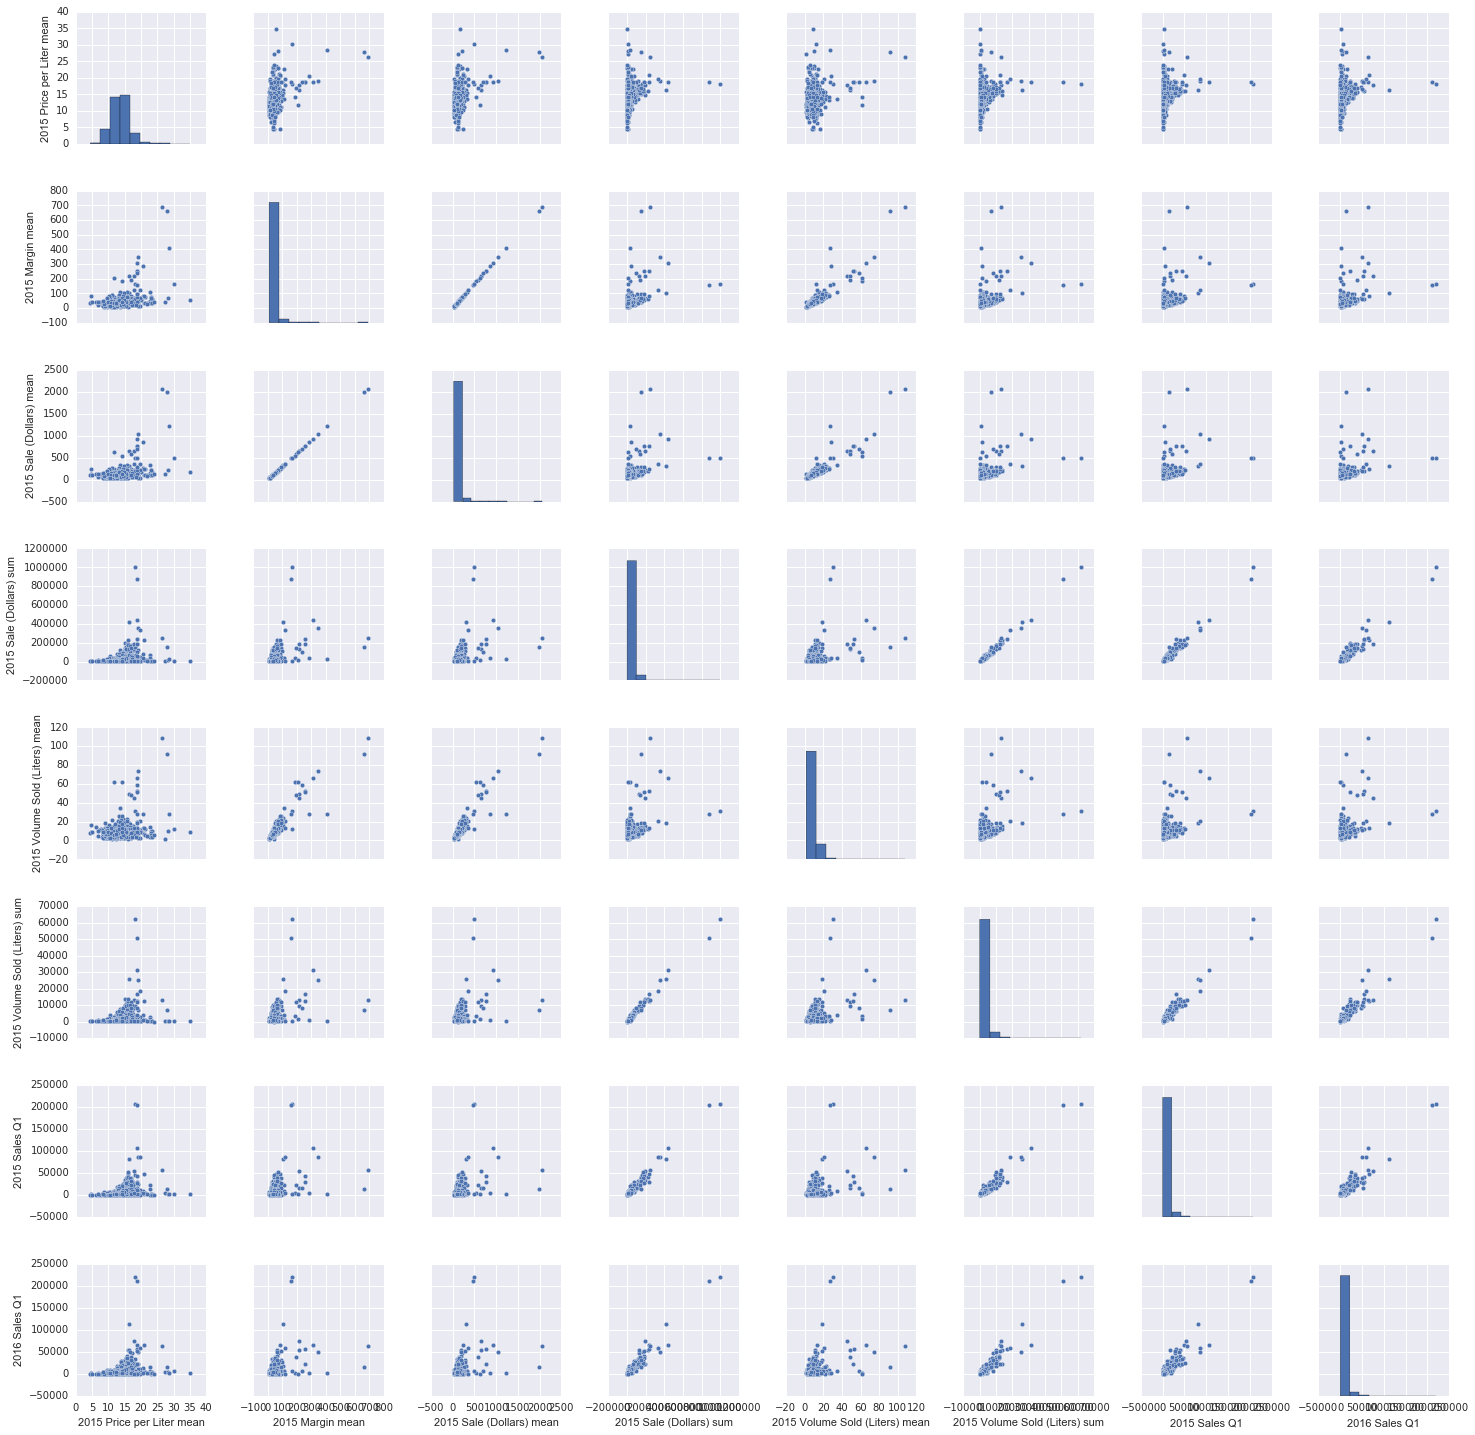

In [588]:
seaborn.pairplot(extended)

#  2015 Sales Q1 vs 2015 Sales sum

In [589]:
X = extended[['2015 Sales Q1']]
y = extended['2015 Sale (Dollars) sum']

In [590]:
(X_train,X_test,y_train,y_test) = train_test_split(X,y)

In [591]:
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train,y_train)
lr.coef_,lr.intercept_

(array([ 4.47420105]), 499.36221334232323)

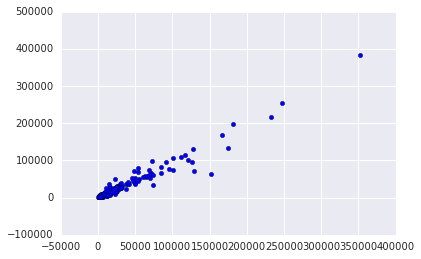

In [592]:
predictions = lr.predict(X_test)
plt.scatter(y_test,predictions)

In [593]:
sklearn.metrics.r2_score(y_test,predictions)

0.94412222307650195

(0, 400000)

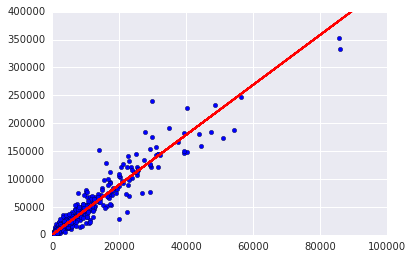

In [594]:
predictions = lr.predict(X)
plt.scatter(X,y)
plt.plot(X,predictions,color = 'red')
plt.xlim(0, 100000)
plt.ylim(0, 400000)

# 2016 sales prediction

In [595]:
X = extended[["2016 Sales Q1"]]
predictions = lr.predict(X)
total_2016 = sum(predictions)
total_2015 = sum(extended["2015 Sale (Dollars) sum"])
X2 = extended[["2015 Sales Q1"]]
pred_2015 = sum(lr.predict(X2))

print "2015 predicted", pred_2015
print "2015 actual", total_2015
print "2016 predicted", total_2016

2015 predicted 26988035.5566
2015 actual 27145508.45
2016 predicted 27308804.4079


In [596]:
extended.head()

,2015 Price per Liter mean,2015 Margin mean,2015 Sale (Dollars) mean,2015 Sale (Dollars) sum,2015 Volume Sold (Liters) mean,2015 Volume Sold (Liters) sum,2015 Sales Q1,2016 Sales Q1
Store Number,,,,,,,,
2106,15.475863,92.671879,277.658861,146326.22,18.466509,9731.85,39287.29,30523.75
2113,16.315646,21.149932,63.334830,9310.22,4.488776,659.85,2833.25,2065.90
2130,14.764286,95.217347,285.386301,111871.43,17.580026,6891.37,24272.57,27856.11
2152,12.887660,18.351277,54.759433,7721.08,4.491986,633.37,2003.46,904.66
2178,14.558692,34.454430,102.633671,24324.18,8.089114,1917.12,5856.41,5588.50


# Price per liter mean vs Volume sold mean

(0, 20)

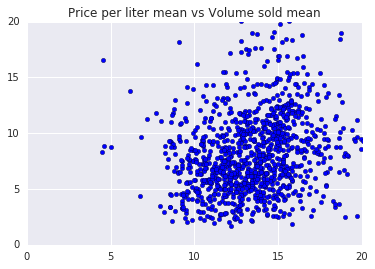

In [600]:
plt.scatter(extended['2015 Price per Liter mean'],extended['2015 Volume Sold (Liters) mean'])
plt.title('Price per liter mean vs Volume sold mean')
plt.xlim(0,20)
plt.ylim(0,20)

In [602]:
X = extended[['2015 Price per Liter mean']]
y = extended['2015 Volume Sold (Liters) mean']
(X_train,X_test,y_train,y_test) = train_test_split(X,y)
r = sklearn.linear_model.RANSACRegressor()
r.fit(X_train,y_train)
r.estimator_.coef_, r.estimator_.intercept_

(array([-0.07635705]), 8.1181142481780491)

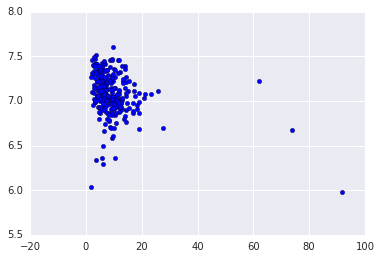

In [603]:
predictions = r.predict(X_test)
plt.scatter(y_test, predictions)

In [604]:
sklearn.metrics.r2_score(y_test,predictions)

-0.078660476264438284